# Praktikum 5 DSP Liebenow

## <u> 1 Vorbereitung:</u>

### a) <u>Berechnung T:</u>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")


Hier der Vergleich der Werte von T als Kehrwert der Abtastfrequenz sowie als zeitlicher Abstand zwischen den Abtastpunkten:
Erwartung: Beide sind gleich

In [2]:
fs=8000
Ts=1/fs
n=np.linspace(0,1,fs)
print("T = ",(n[1]-n[0])*1000, "ms")
print("T = ",Ts*1000, "ms")

T =  0.12501562695336918 ms
T =  0.125 ms


* da np.linspace den "Endwert" nicht einbezieht, entsteht eine vernachlässigbar kleine Abweichung.

### b) <u>Stützstellenfrequenz $f_k$ :</u>

### $f_k = f_s*\frac{k}{N}$

In [3]:
print("Bsp: k=10, N=2000")
k=10
N=2000
f_k=k*fs/N
print("fk = ",f_k)

Bsp: k=10, N=2000
fk =  40.0


### c) <u>logarithmische Darstellungsformen:</u>

Als Signal dient hier die Melodie aus dem Tutorium (bzw. aus dem Code von Werner)

In [4]:
A = 440 #5           440 Hz
Dh = A*2**(5/12) #7  587 Hz
C = A*2**(3/12)  #4  523 Hz
B = A*2**(2/12)  #8  493 Hz
G = A*2**(-2/12) #6  391 Hz
Fis = A*2**(-3/12)
E = A*2**(-5/12)
D = A*2**(-7/12) #2  293 Hz

pitch = [D, G, G, A, B, G, Dh, B, B, C, Dh, C, B, C, Dh, A, G, A, B, A]
duration = [2, 2, 1, 1, 2, 2, 4, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2]
Sc = 1/4
#% time scaling
fs = 8000 
audiosig = np.array([])

for k in range(0,len(pitch)): #% for loop
    L = Sc*fs*duration[k] # % number of samples per tone
    n = np.arange(0,L-1) # % normalized time
    w = (2*np.pi/fs)*pitch[k] # % normalized radian frequency
    s = np.sin(w*n) # sinusoidal tone
    audiosig = np.append(audiosig,s) #= [audiosig s]  # % concatenate audio signal


from IPython.lib.display import Audio
Audio(audiosig, rate=fs)

Erstellung einer Funktion zur Berechnung $f_k$:

In [5]:
def makeFK(X_f,Fsample):
    N=X_f.size
    fk_Axis=np.zeros(N)
    for k in range(N):
        fk_Axis[k]=(k/N)*Fsample
    return fk_Axis

Erstellung einer Funktion zur Normalisierung:

In [6]:
def normalize(sig):
    max=0
    for i in range(0,sig.size):
        if sig[i]>max:
            max=sig[i]
    return sig/max

Transformation in den Spektralbereich und Plot:

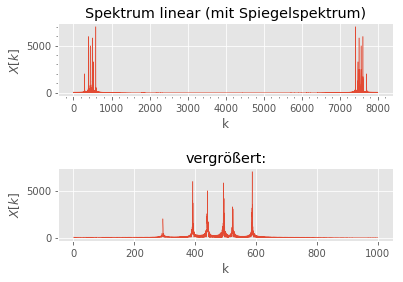

In [7]:
spec=np.fft.fft(audiosig)

f_k=makeFK(spec,fs)
plt.subplot(211)
plt.plot(f_k,abs(spec),linewidth=0.5)
plt.minorticks_on()
plt.xlabel("k")
plt.ylabel("$X[k]$")
plt.title("Spektrum linear (mit Spiegelspektrum)")
plt.subplot(212)
plt.plot(f_k[0:fs],abs(spec[0:fs]),linewidth=0.5)
plt.xlabel("k")
plt.ylabel("$X[k]$")
plt.title("vergrößert:")
plt.subplots_adjust(hspace=1);

* Die Dargestellten Frequenzen passen zu den im Signal generierten Tönen, um diese jedoch zu identifizieren ist es notwendig den zu betrachtenden Zeitabschnitt einzugrenzen wenn die Darstellung linear gewählt wird !

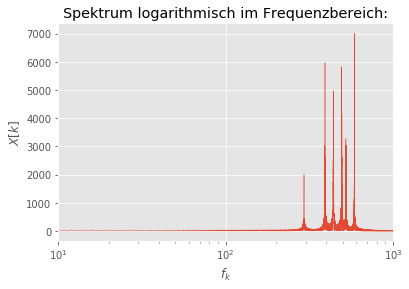

In [8]:
plt.plot(f_k[0:fs],abs(spec[0:fs]),linewidth=0.5)
plt.semilogx()
plt.xlabel("$f_k$")
plt.ylabel("$X[k]$")
plt.title("Spektrum logarithmisch im Frequenzbereich:")
plt.xlim(10,1000);

* Für dieses Signal hat die logarithmische Darstellung keinen Vorteil, da nur sehr wenige Frequenzen in einem schmalen Bereich auftreten.
* Bei breitbandigen Betrachtungen, kann sie ihre Stärken ausspielen

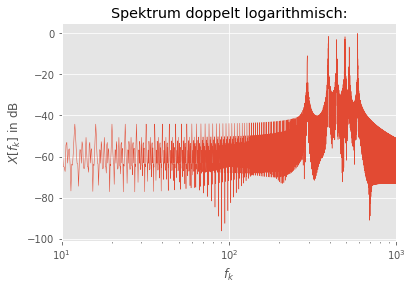

In [9]:
plt.plot(f_k[0:fs],20*np.log10(normalize(abs(spec[0:fs]))),linewidth=0.5)
plt.semilogx()
plt.xlabel("$f_k$")
plt.ylabel("$X[f_k]$ in dB")
plt.xlim(10,1000);
plt.title("Spektrum doppelt logarithmisch:");

* die doppelt logarithmische Darstellung kann kleinste Werte sehr gut Darstellen, die linear kaum zu erkennen währen!

### d) <u>Die WAV - Datei:</u>

In [10]:
from scipy.io import wavfile

In [11]:
track = "Audio/abends.wav"
[f_s,sound]=wavfile.read(track)

In [12]:
print("Die Aufnahme:")
Audio(sound, rate=f_s)

Die Aufnahme:


* gewählter Vokal "O" bei 5,766 bis 5,893 Sekunden gemäß Audacity

In [13]:
start=int(5.766*f_s)
end=int(5.893*f_s)

In [14]:
voc=sound[start:end]
Audio(voc,rate=f_s)

## <u>2 Aufgaben:</u>

### 2.1) <u>Signaldarstellung im Zeitbereich:</u>

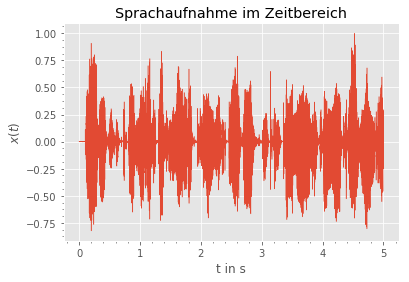

In [15]:
t=np.linspace(0,sound.size/f_s,sound.size)
x_t=normalize(sound)
#um das Signal auf 5 Sekunden gemäß der Aufgabenstellung zu begrenzen plotte ich nur die Werte bis 5 * 44100
plt.plot(t[0:5*f_s],x_t[0:5*f_s],linewidth=0.5)
plt.minorticks_on()
plt.title("Sprachaufnahme im Zeitbereich")
plt.xlabel("t in s")
plt.ylabel("$x(t)$");

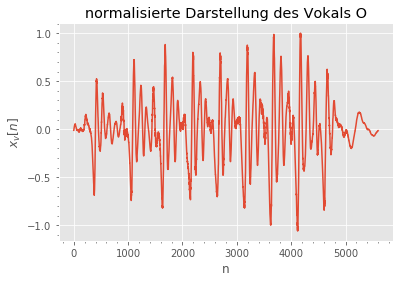

In [16]:
plt.plot(normalize(voc))
plt.minorticks_on()
plt.title("normalisierte Darstellung des Vokals O")
plt.xlabel("n")
plt.ylabel("$x_v[n]$");

### 2.2) <u>Signaldarstellung im Frequenzbereich:</u>

Da meine Aufnahme eine hohe Abtastrate hat ($f_s=44100$), wähle ich eine höhere Ordnung um eine genauere Darstellung der "peaks" zu gewährleisten.

In [17]:
ordnung=8192
o_half=int(ordnung/2)

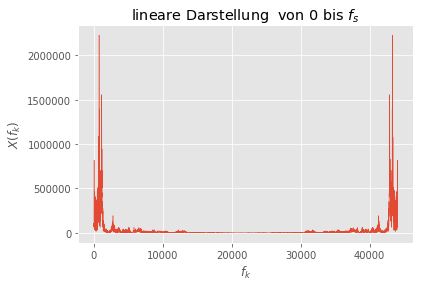

In [18]:
X_f=np.fft.fft(sound,ordnung)
FrqAxis=makeFK(X_f,f_s)
plt.plot(FrqAxis,abs(X_f),linewidth=0.5)
plt.title("lineare Darstellung  von 0 bis $f_s$")
plt.xlabel("$f_k$")
plt.ylabel("$X(f_k)$");

* Die enthaltenen Frequenzen des Signals scheinen im Bereich $10^2$ bis $10^3$ zu sein! 
* Auch hier ist von der fs nach links gehend, die Spiegelung des Signals zu erkennen.

22050


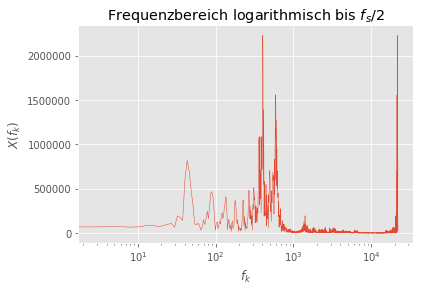

In [19]:
f_s_half=int(f_s/2)
FrqAxis2=makeFK(X_f,f_s_half)
plt.plot(FrqAxis2,abs(X_f[0:f_s_half]),linewidth=0.5)
plt.title("Frequenzbereich logarithmisch bis $f_s/ 2$")
plt.xlabel("$f_k$")
plt.ylabel("$X(f_k)$")
plt.semilogx();

* Bei der logarithmischen Darstellung der Frequenzachse, sind die einzelnen Frequenzanteile deutlicher zu erkennen !

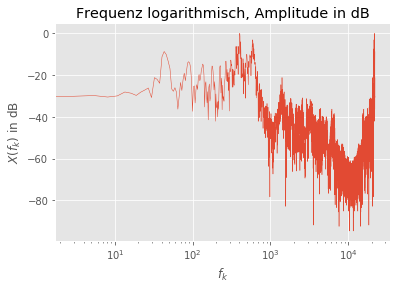

In [20]:
#Darstellung des in dB umgerechneten normalisierten Betrages der FFT bis fs/2:
logSig=20*np.log10(normalize(abs(X_f)))
plt.plot(FrqAxis2,logSig[0:f_s_half],linewidth=0.5)
plt.title("Frequenz logarithmisch, Amplitude in dB")
plt.xlabel("$f_k$")
plt.ylabel("$X(f_k)$ in dB")
plt.semilogx();

* Auch hier sind die Frequenzanteile gut zu erkennen, es wirkt allerdings unübersichtlicher als die obere Abbildung.

### 2.3) Darstellungen für die DFT $X_v(f)$ von $x_v(n)$ also dem Vokal

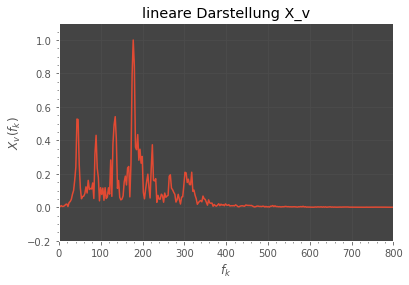

In [21]:
X_v=abs(np.fft.fft(voc,ordnung))
X_v_normed=normalize(X_v)
fk_voc=makeFK(X_v,f_s_half)
plt.plot(fk_voc[0:f_s_half],X_v_normed[0:f_s_half])
plt.xlabel("$f_k$")
plt.ylabel("$X_v(f_k)$")
plt.title("lineare Darstellung X_v")
plt.ylim(-0.2,1.1)
plt.xlim([-1,800])
plt.minorticks_on()
plt.fill_between(fk_voc[0:f_s_half],-110,X_v_normed[0:f_s_half], alpha=0.7, facecolor="black")
plt.fill_between(fk_voc[0:f_s_half],10,X_v_normed[0:f_s_half], alpha=0.7, facecolor="black");

* Der Frequenzbereich passt zu dem Vokal "o" eines Mannes. 
* Die Abstände sind Äquidistant und lassen auf Oberwellen schließen.

#### Logarithmische Betrachtung

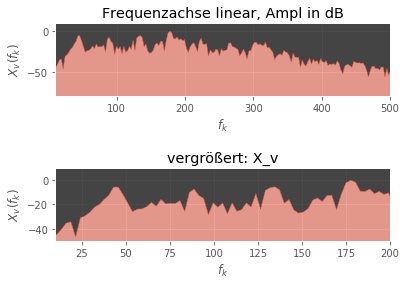

In [22]:
X_vok=20*np.log10(X_v_normed[0:f_s_half])
fmax=500

plt.subplot(211)
plt.plot(fk_voc[0:f_s_half],X_vok[0:f_s_half],linewidth=0.5)
plt.xlabel("$f_k$")
plt.ylabel("$X_v(f_k)$")
plt.title("Frequenzachse linear, Ampl in dB")
plt.ylim(-80,10)
plt.xlim([10,fmax])
plt.fill_between(fk_voc,-110,X_vok, alpha=0.5)
plt.fill_between(fk_voc,10,X_vok, alpha=0.7, facecolor="black")

plt.subplot(212)
plt.plot(fk_voc[0:f_s_half],X_vok[0:f_s_half],linewidth=0.5)
plt.xlabel("$f_k$")
plt.ylabel("$X_v(f_k)$")
plt.title("vergrößert: X_v")
plt.ylim(-50,10)
plt.xlim([10,fmax-300])
plt.fill_between(fk_voc,-110,X_vok, alpha=0.5)
plt.fill_between(fk_voc,10,X_vok, alpha=0.7, facecolor="black")

plt.subplots_adjust(hspace=1);


* Bei dieser Abbildung habe ich stark "gezoomt", daher kann man erkennen, dass die Grundfrequenz etwa 45 Hz beträgt. Aus diesem Grund habe ich die Ordnung höher als in der Aufgabenstellung gewählt.
* Die Oberwellen sind bei 90, 135 und 180 Hz deutlich zu erkennen. Die Tiefe lässt sich durch Aufnahmezeit, Tabakkonsum und Nahbesprechungseffekt erklären und ist nicht unrealistisch.
* Der peak bei 180 Hz könnte auf Grund von stehenden Wellen (durch den Bildschirm hinter dem Mikrofon) entstanden sein. Denn die Viertel Wellenlänge von dieser Frequenz entspricht in etwa dem Abstand zum Monitor.

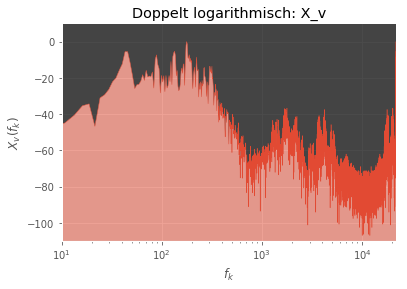

In [23]:
plt.plot(fk_voc[0:f_s_half],X_vok[0:f_s_half],linewidth=0.5)
plt.fill_between(fk_voc,-110,X_vok, alpha=0.5)
plt.fill_between(fk_voc,10,X_vok, alpha=0.7, facecolor="black")
plt.semilogx()
plt.xlabel("$f_k$")
plt.ylabel("$X_v(f_k)$")
plt.title("Doppelt logarithmisch: X_v")
plt.ylim(-110,10)
plt.xlim([10,f_s_half]);

In der doppelt logarithmischen Darstellung ist das Gleiche zu erkennen.